## Simple Neural Network

The linear function  $$f(x) = ax_1 + bx_2$$, where `a` and `b` are constants.

Epoch: 1, Training Loss: 53.51829528808594, Validation Loss: 6.061528205871582
Epoch: 2, Training Loss: 53.198875427246094, Validation Loss: 6.026628494262695
Epoch: 3, Training Loss: 52.874244689941406, Validation Loss: 5.991149425506592
Epoch: 4, Training Loss: 52.544776916503906, Validation Loss: 5.955016613006592
Epoch: 5, Training Loss: 52.21065139770508, Validation Loss: 5.9187164306640625
Epoch: 6, Training Loss: 51.87220764160156, Validation Loss: 5.881731986999512
Epoch: 7, Training Loss: 51.52889633178711, Validation Loss: 5.844058990478516
Epoch: 8, Training Loss: 51.18120574951172, Validation Loss: 5.8059563636779785
Epoch: 9, Training Loss: 50.828670501708984, Validation Loss: 5.7674665451049805
Epoch: 10, Training Loss: 50.47248077392578, Validation Loss: 5.728104114532471
Epoch: 11, Training Loss: 50.1126823425293, Validation Loss: 5.6882805824279785
Epoch: 12, Training Loss: 49.748653411865234, Validation Loss: 5.647886753082275
Epoch: 13, Training Loss: 49.379806518554

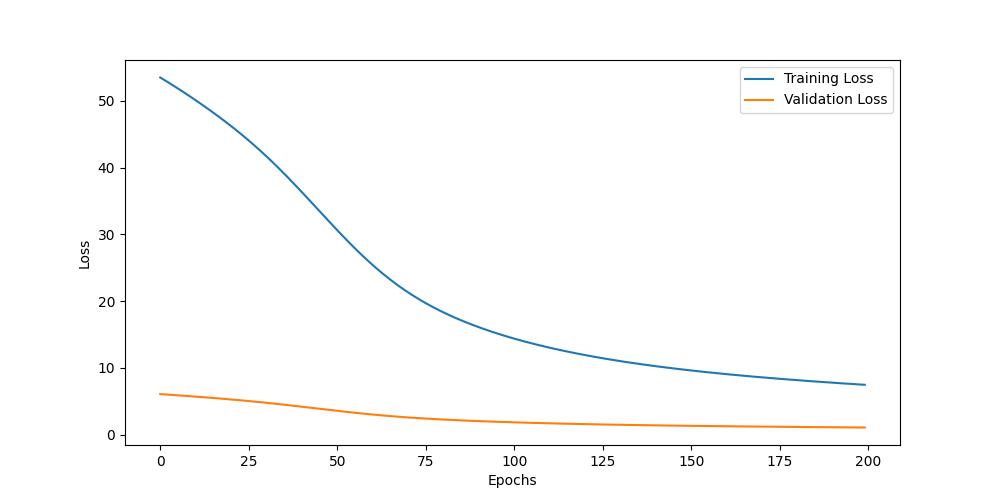

In [9]:
%matplotlib widget  
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the linear function
def f(x, a, b):
    f = a * x[:,0] + b * x[:,1]
    return f.unsqueeze(1)

# Define the constants a, b, and c
a, b = 2, 1

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # 2 input features, 3 nodes in hidden layer
        self.fc2 = nn.Linear(3, 1)   # 3 nodes in hidden layer, 1 output node

    def forward(self, x):
        y1 = self.fc1(x)
        y2 = torch.relu(y1)
        y = self.fc2(y2)
        return y

# Create the network
net = Net()

# Create a synthetic dataset
x_train = torch.randn(10000, 2)
# y_train = (2*x_train[:,0] + x_train[:,1]).unsqueeze(1) #torch.sum(x_train, axis=1).view(-1, 1)
y_train = f(x_train, a, b)

x_val = torch.randn(200, 2)
# y_val = (2*x_val[:,0]+x_val[:,1]).unsqueeze(1)
y_val = f(x_val, a, b)

# Define a loss function and an optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Prepare lists to save the losses
train_losses = []
val_losses = []

c = 10

# Train the network
for epoch in range(200):  # loop over the dataset multiple times
    net.train()
    optimizer.zero_grad()   # zero the gradient buffers
    y_predict = net(x_train)   # forward pass
    loss = c*criterion(y_predict, y_train)  # compute loss
    loss.backward()         # backpropagation
    optimizer.step()        # update weights

    net.eval()
    with torch.no_grad():
        val_output = net(x_val)
        val_loss = criterion(val_output, y_val)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f'Epoch: {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print('Finished Training')

# Save the model
torch.save(net.state_dict(), 'model.pth')

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Load the model
model = Net()
model.load_state_dict(torch.load('model.pth'))

x_test = torch.randn(1,2)
y_expected = f(x_test, a, b)
print("x_test : ",x_test)
print("y_expected : ",y_expected)

y_predicted = model(x_test)
print("y_predicted : ",y_predicted)


x_test :  tensor([[-1.0864,  0.6933]])
y_expected :  tensor([[-1.4795]])
y_predicted :  tensor([[-1.4712]], grad_fn=<AddmmBackward0>)


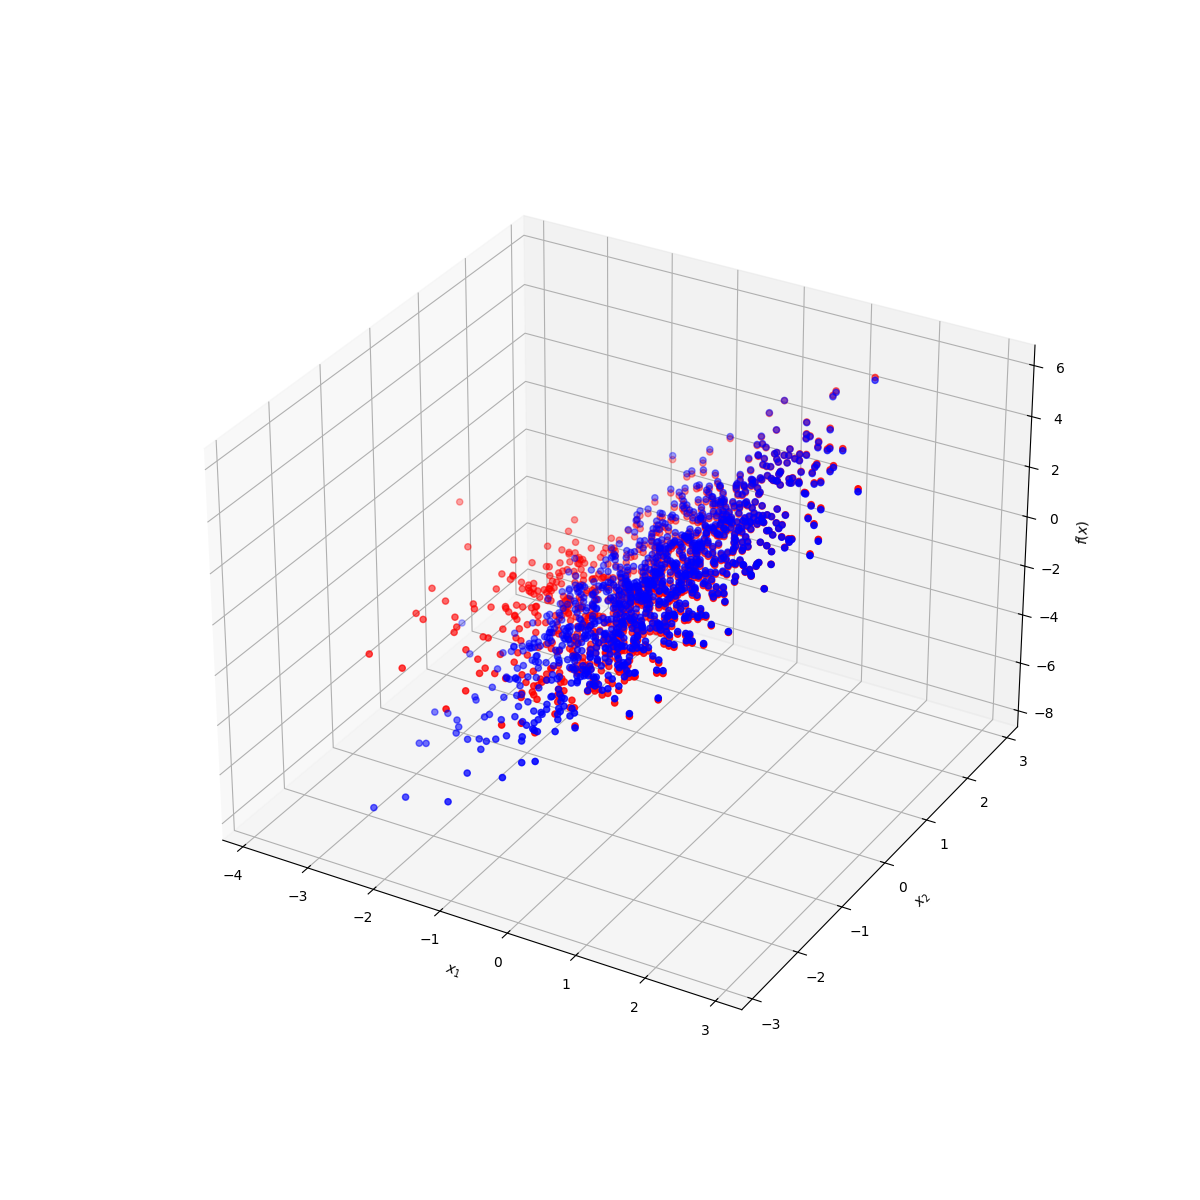

In [11]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
x_test = torch.randn(1000,2)
y_predicted = model(x_test)

ax.scatter(x_test[:,0], x_test[:,1], f(x_test, a, b), c='b', marker='o')
ax.scatter(x_test[:,0], x_test[:,1], y_predicted.detach(), c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

plt.show()